In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from readers import OpenEphysReader, BinaryReader, ExcelReader

In [2]:
rec_table = pd.read_excel('/media/sil2/Data/Lizard/Stellagama/brainStatesSS_ShW.xlsx')
rec_table = rec_table.query('Exclude!=Exclude and 26 <= tempMedian <= 28').set_index(['Animal', 'recNames']).drop(columns=['videoSync', 'eyeVideo', 'Breathing', 'sortedManually'])
rec_table

Exclude spikes  \
Animal recNames                        
SA03   sleepNight1b       NaN    NaN   
       sleepNight3b       NaN    NaN   
       sleepNight4b       NaN      2   
SA04   sleepNight2b       NaN    NaN   
       sleepNight7b       NaN    NaN   
       sleepNight8b       NaN    NaN   
SA05   sleepNight1b       NaN      0   
       sleepNight19b      NaN    NaN   
SA06   sleepNight16b      NaN      1   
SA05   sleepNight20b      NaN      1   
SA06   sleepNight17b      NaN      1   
SA07   sleepNight3        NaN    NaN   
       sleepNight4        NaN    NaN   
SA05   sleepNight25b      NaN    NaN   
SA07   sleepNight9        NaN      2   
       sleepNight24       NaN      2   
SA09   sleepNight10       NaN    NaN   
SA10   sleepNight1        NaN    NaN   
       sleepNight2        NaN    NaN   
       sleepNight3        NaN    NaN   
       sleepNight4        NaN    NaN   
       sleepNight5        NaN    NaN   
       sleepNight6        NaN    NaN   
SA11   sleepNight7        NaN    NaN   
       sleepNight8        NaN    NaN   
SA15   sleepNight1        NaN    NaN   
       sleepNight3        NaN    NaN   
       sleepNight4        NaN    NaN   
       sleepNight5        NaN    NaN   

                                                                Remarks  \
Animal recNames                                                           
SA03   sleepNight1b                                 maybe noisy - Regev   
       sleepNight3b                                 maybe noisy - Regev   
       sleepNight4b                                                 NaN   
SA04   sleepNight2b                      low SNR? Part time oscilations   
       sleepNight7b                                               NOISY   
       sleepNight8b                                 maybe noisy - Regev   
SA05   sleepNight1b                                                 NaN   
       sleepNight19b                                maybe noisy - Regev   
SA06   sleepNight16b                                 Noise in recording   
SA05   sleepNight20b                                            low SNR   
SA06   sleepNight17b                                                NaN   
SA07   sleepNight3                                                  NaN   
       sleepNight4                                                  NaN   
SA05   sleepNight25b                                            low SNR   
SA07   sleepNight9                                                  NaN   
       sleepNight24                                                 NaN   
SA09   sleepNight10                                     Noisy recording   
SA10   sleepNight1           accelerometer data corruput - all constant   
       sleepNight2           accelerometer data corruput - all constant   
       sleepNight3                                                  NaN   
       sleepNight4                                                  NaN   
       sleepNight5             Some noise in high pass, no good E-sleep   
       sleepNight6    Video times are from front view camera (109 mi...   
SA11   sleepNight7           accelerometer data corruput - all constant   
       sleepNight8                       Frames are from topview camera   
SA15   sleepNight1                                                  NaN   
       sleepNight3                                                  NaN   
       sleepNight4                                                  NaN   
       sleepNight5                                                  NaN   

                          Date    MEAfiles        recFormat  Sex  \
Animal recNames                                                    
SA03   sleepNight1b   100221.0  ch1_32.bin  binaryRecording    M   
       sleepNight3b   130221.0  ch1_32.bin  binaryRecording    M   
       sleepNight4b   130221.0  ch1_32.bin  binaryRecording    M   
SA04   sleepNight2b   110321.0    ch17.bin  binaryRecording    F   
       sleepNight7b        NaN    ch14.bin  bin

In [4]:
xls = ExcelReader(rec_table.reset_index(), is_debug=True, desired_fs=1000)

In [5]:
rp = xls.get('SA07', '4')

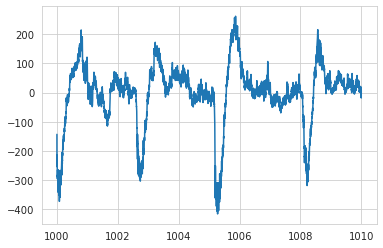

In [7]:
v, t = rp.read(t_start=1e6/1000, t_stop=1e6/1000 + 10)
plt.plot(t, v)